In [1]:
from rtree import index
from rtree.index import Rtree
p = index.Property()
idx = index.Index(properties=p)
idx

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import shapely
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

1. Find all the vessels that visited ports in the provided shapefile (Nima_Ports.Zip). For this part, you are going to create a buffer with an appropriate radius around the shape of each all polygons in the shapefile. Second, you are going to find all the AIS messages (from AIS data) that intersect with these ports. (​20 points​) 

In [3]:
df=pd.read_csv('AISData.csv')

In [4]:
df.head()

,Unnamed: 0,event_time,location.coordinates.0,location.coordinates.1,position_accuracy,mmsi,sog,cog
0,0,2019-04-11T09:47:30.153Z,-63.556082,44.624835,0.0,316013808,3.0,319.500000
1,1,2019-04-11T09:47:27.273Z,-63.556053,44.624817,0.0,316013808,3.0,320.700012
2,2,2019-04-11T09:47:34.340Z,-63.556138,44.624868,0.0,316013808,2.9,319.500000
3,3,2019-04-11T09:47:37.087Z,-63.556187,44.624898,0.0,316013808,3.0,319.799988
4,4,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012


In [9]:
df = df.rename(columns={"location.coordinates.0": "x", "location.coordinates.1": "y"})

In [10]:
df.head()

,Unnamed: 0,event_time,x,y,position_accuracy,mmsi,sog,cog
0,0,2019-04-11T09:47:30.153Z,-63.556082,44.624835,0.0,316013808,3.0,319.500000
1,1,2019-04-11T09:47:27.273Z,-63.556053,44.624817,0.0,316013808,3.0,320.700012
2,2,2019-04-11T09:47:34.340Z,-63.556138,44.624868,0.0,316013808,2.9,319.500000
3,3,2019-04-11T09:47:37.087Z,-63.556187,44.624898,0.0,316013808,3.0,319.799988
4,4,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012


In [11]:
gdf = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])

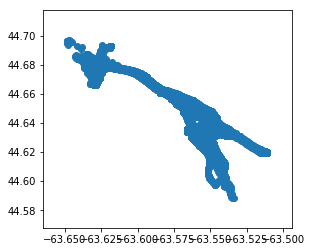

In [12]:
gdf.plot()

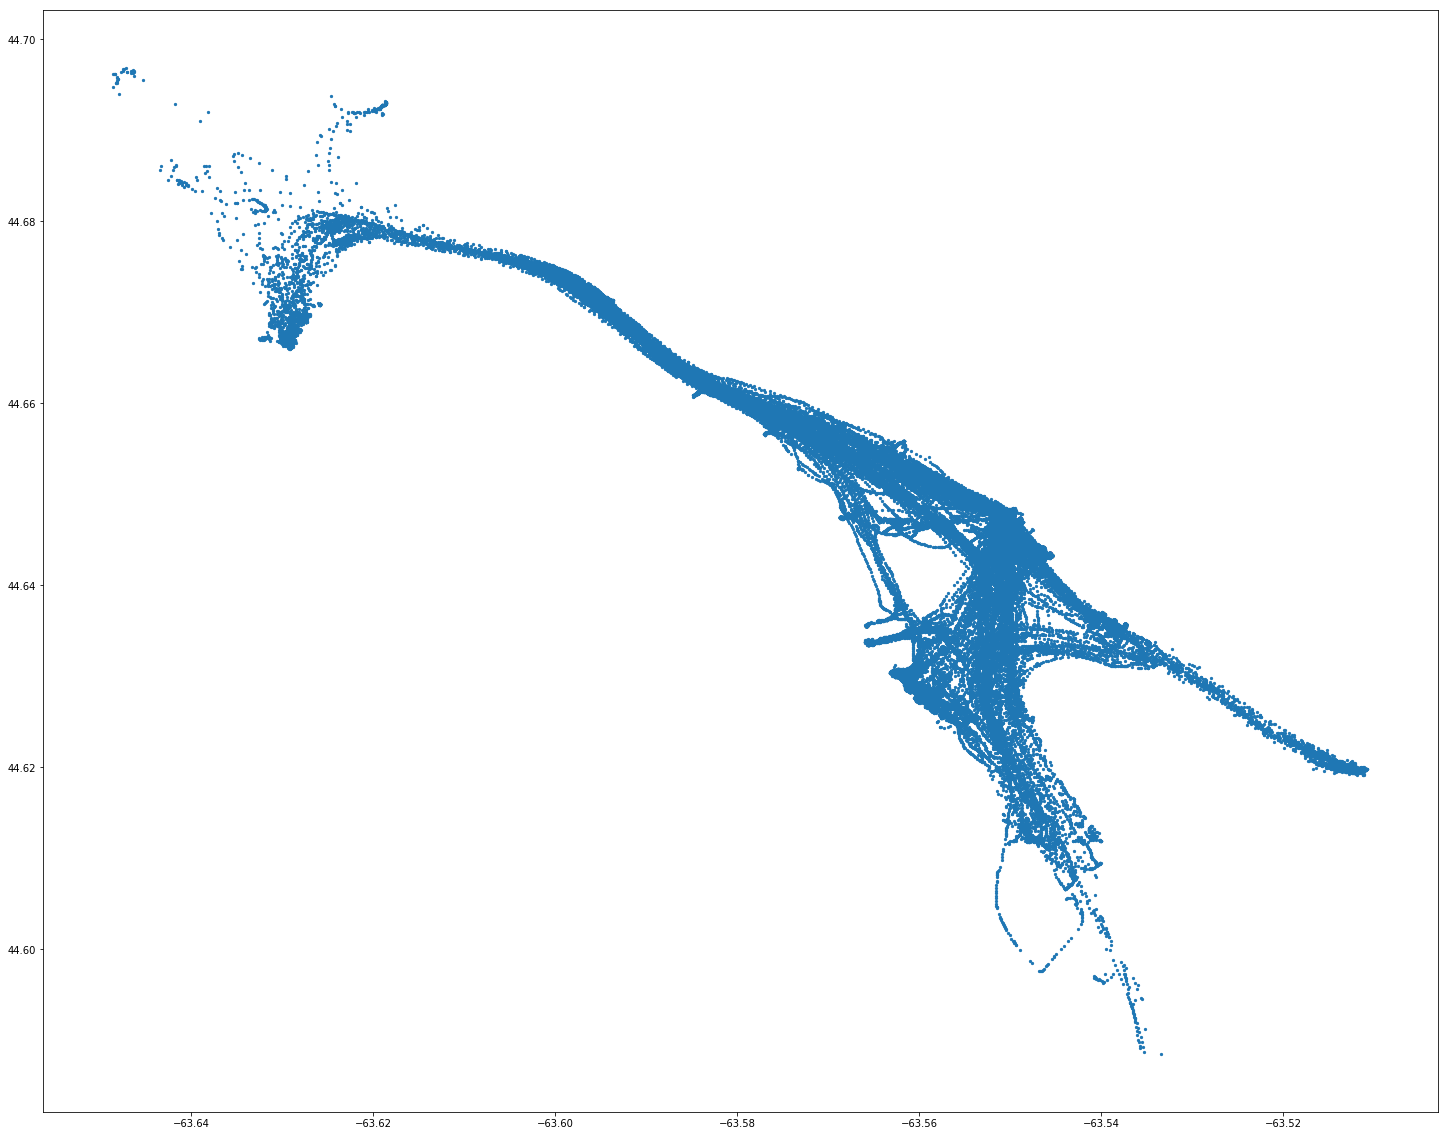

In [13]:
ax=gdf.plot(figsize=(25,25),markersize=5)

In [15]:
location=gpd.read_file('assignment3shapefile.shp')
location.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
field_1      26 non-null int64
port_name    26 non-null object
size         26 non-null float64
geometry     26 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 912.0+ bytes


In [16]:
print(location)

    field_1                    port_name    size  \
0         0                 pointpolygon  0.0000   
1         1                        port1  0.0018   
2         2                        port2  0.0018   
3         3                          ind  0.0000   
4         4                        port5  0.0018   
5         5                        port6  0.0018   
6         6                        port7  0.0018   
7         7              south_enterance  0.0000   
8         8                    auto_port  0.0015   
9         9  southend container terminal  0.0050   
10       10                     NN Jetty  0.0020   
11       11                 Bills island  0.0020   
12       12                  mid bedford  0.0040   
13       13                Fairview cove  0.0040   
14       14                     armament  0.0020   
15       15                 waterfront h  0.0020   
16       16                     northarm  0.0020   
17       17                         plll  0.0015   
18       18 

In [17]:
byname=location.set_index(['port_name'])

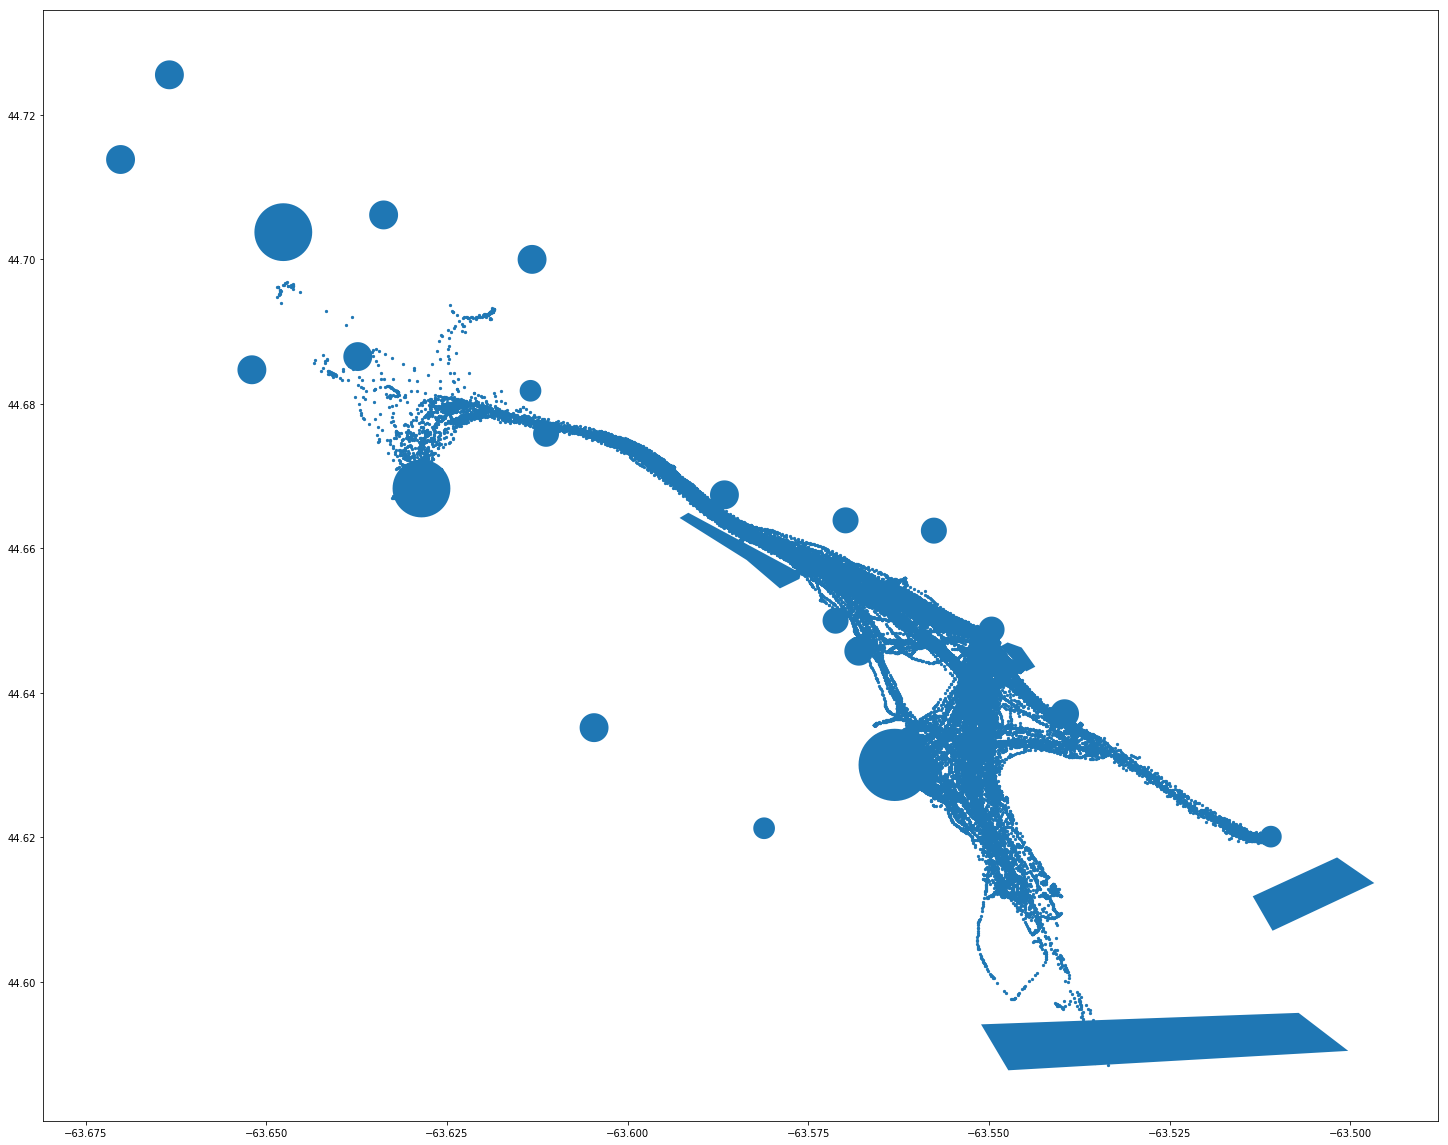

In [23]:
ax =byname.plot(figsize=(25,25))
gdf.plot(ax=ax,figsize=(25,25),markersize=5)

In [25]:
port_name = location['port_name'].unique()

array(['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7',
       'south_enterance', 'auto_port', 'southend container terminal',
       'NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove',
       'armament', 'waterfront h', 'northarm', 'plll', 'pp', 'po001',
       'po002', 'oulier_maybecday', 'p003', 'enter2', 'p009', 'p010'],
      dtype=object)

In [27]:
len(port_name)

26

In [28]:
port_centroid = []

In [29]:
for port in port_name:
    c = byname.loc[[port],:].centroid
    port_centroid.append(c[0])

In [30]:
port_centroid

In [34]:
port_min = []
for pc in port_centroid:
    m = gdf.loc[gdf.distance(pc)==gdf.distance(pc).min(),:]
    port_min.append(m)

# p1=gdf.loc[gdf.distance(dh[0])==gdf.distance(dh[0]).min(),:]
# p2=gdf.loc[gdf.distance(dd[0])==gdf.distance(dd[0]).min(),:]

In [35]:
port_min

[       Unnamed: 0                event_time  position_accuracy       mmsi  \
 45411        2950  2019-05-19T04:57:18.143Z                0.0  316013808   
 
        sog         cog                              geometry  
 45411  1.2  126.400002  POINT (-63.58300166666667 44.660945)  ,
        Unnamed: 0                event_time  position_accuracy       mmsi  \
 50282          36  2019-05-25T14:32:15.719Z                0.0  316013808   
 
         sog         cog                              geometry  
 50282  11.1  118.599998  POINT (-63.570925 44.65150833333333)  ,
        Unnamed: 0                event_time  position_accuracy       mmsi  \
 42618         157  2019-07-10T16:06:36.493Z                0.0  316013808   
 42619         158  2019-07-10T16:06:42.357Z                0.0  316013808   
 
        sog         cog                              geometry  
 42618  5.6  275.100006  POINT (-63.61152666666667 44.676605)  
 42619  5.6  275.100006  POINT (-63.61152666666667 44.676605

In [36]:
port_min_buffer = []
for pm in port_min:
    pmb = pm.iloc[0,:].geometry.buffer(0.0008)
    port_min_buffer.append(pmb)

In [90]:
port_centroid

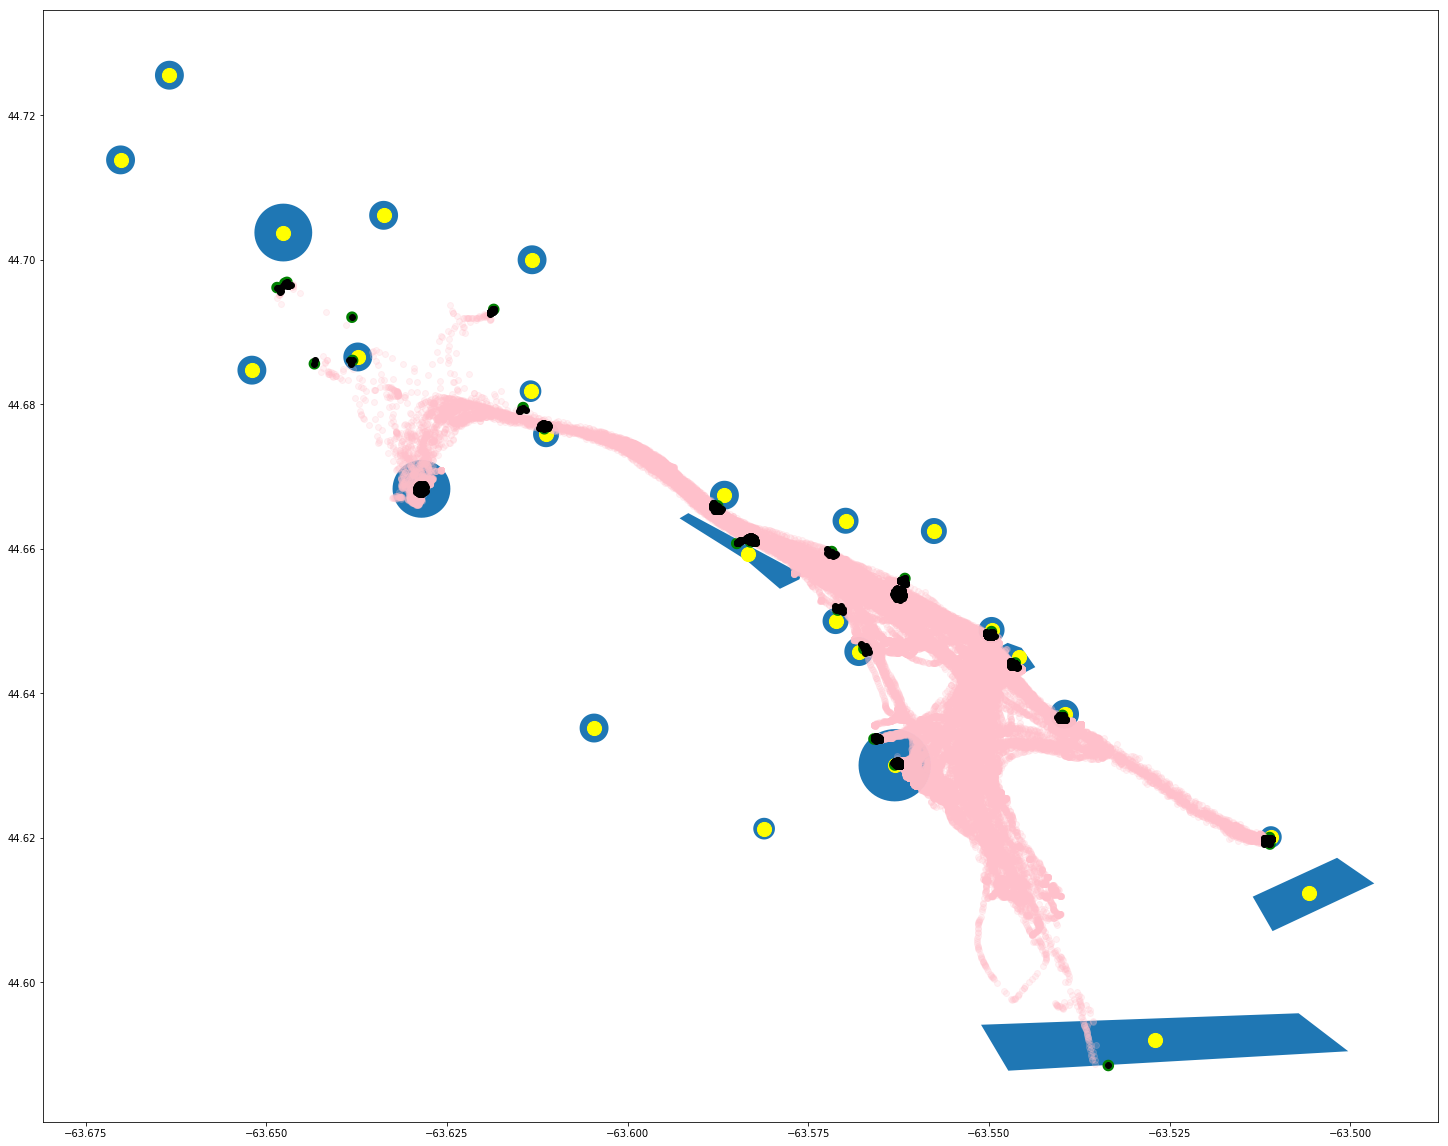

In [41]:
ax =byname.plot(figsize=(25,25))
gpd.GeoSeries(port_centroid).plot(ax=ax,color='yellow',markersize=200)
gpd.GeoSeries(port_min_buffer).plot(ax=ax,color='g',markersize=200)
gdf.plot(ax=ax,color='pink',alpha=0.2)
for pmb in port_min_buffer:
    gdf.loc[gdf.within(pmb),:].plot(ax=ax,color='k')

2. Show the density (i.e., density is the number of AIS messages in a port), of each port on a map by using a colour-coded map. (​20 points​) 


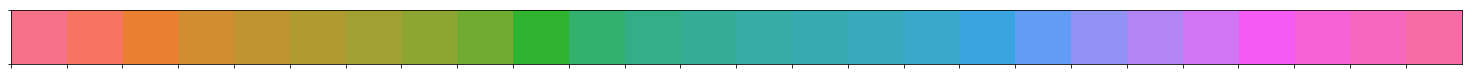

In [46]:
sns.palplot(sns.color_palette("husl", 26))

In [48]:
current_palette = sns.color_palette("husl", 26)

In [67]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 766671 entries, 0 to 766670
Data columns (total 7 columns):
Unnamed: 0           766671 non-null int64
event_time           766671 non-null object
position_accuracy    697295 non-null float64
mmsi                 766671 non-null int64
sog                  697295 non-null float64
cog                  697295 non-null float64
geometry             766671 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 40.9+ MB


In [68]:
byname.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26 entries, pointpolygon to p010
Data columns (total 3 columns):
field_1     26 non-null int64
size        26 non-null float64
geometry    26 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [80]:
# change the crs of geodataframe for join
gdf_test = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
crs={'proj': 'longlat', 'a': 255000, 'b': 255000, 'no_defs': True},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])

In [87]:
joinres=gpd.sjoin(gdf_test,byname,op='within',how='left')

In [88]:
joinres.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835),NaN,NaN,NaN
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667),NaN,NaN,NaN
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333),NaN,NaN,NaN


In [89]:
joinres['index_right'].unique()

array([nan, 'auto_port', 'po001', 'ind', 'port7',
       'southend container terminal', 'armament', 'south_enterance',
       'p010', 'Fairview cove', 'port2', 'pointpolygon', 'waterfront h',
       'port1', 'oulier_maybecday'], dtype=object)

In [71]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [72]:
type(byname)

geopandas.geodataframe.GeoDataFrame

In [86]:
byname.index

Index(['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7',
       'south_enterance', 'auto_port', 'southend container terminal',
       'NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove', 'armament',
       'waterfront h', 'northarm', 'plll', 'pp', 'po001', 'po002',
       'oulier_maybecday', 'p003', 'enter2', 'p009', 'p010'],
      dtype='object', name='port_name')

In [74]:
gdf.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835)
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667)
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333)


In [76]:
gdf['geometry'].crs

{'init': 'epsg:4326'}

In [75]:
byname['geometry'].crs

{'proj': 'longlat', 'a': 255000, 'b': 255000, 'no_defs': True}

In [73]:
byname.head(3)

,field_1,size,geometry
port_name,,,
pointpolygon,0,0.0000,"POLYGON ((-63.59160304069519 44.6649292254607,..."
port1,1,0.0018,"POLYGON ((-63.569431 44.649993, -63.5694396674..."
port2,2,0.0018,"POLYGON ((-63.60949000000001 44.675853, -63.60..."


In [79]:
joinres.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835),NaN,NaN,NaN
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667),NaN,NaN,NaN
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333),NaN,NaN,NaN


In [69]:
joinres.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 766671 entries, 0 to 766670
Data columns (total 10 columns):
Unnamed: 0           766671 non-null int64
event_time           766671 non-null object
position_accuracy    697295 non-null float64
mmsi                 766671 non-null int64
sog                  697295 non-null float64
cog                  697295 non-null float64
geometry             766671 non-null object
index_right          716621 non-null object
field_1              716621 non-null float64
size                 716621 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 64.3+ MB


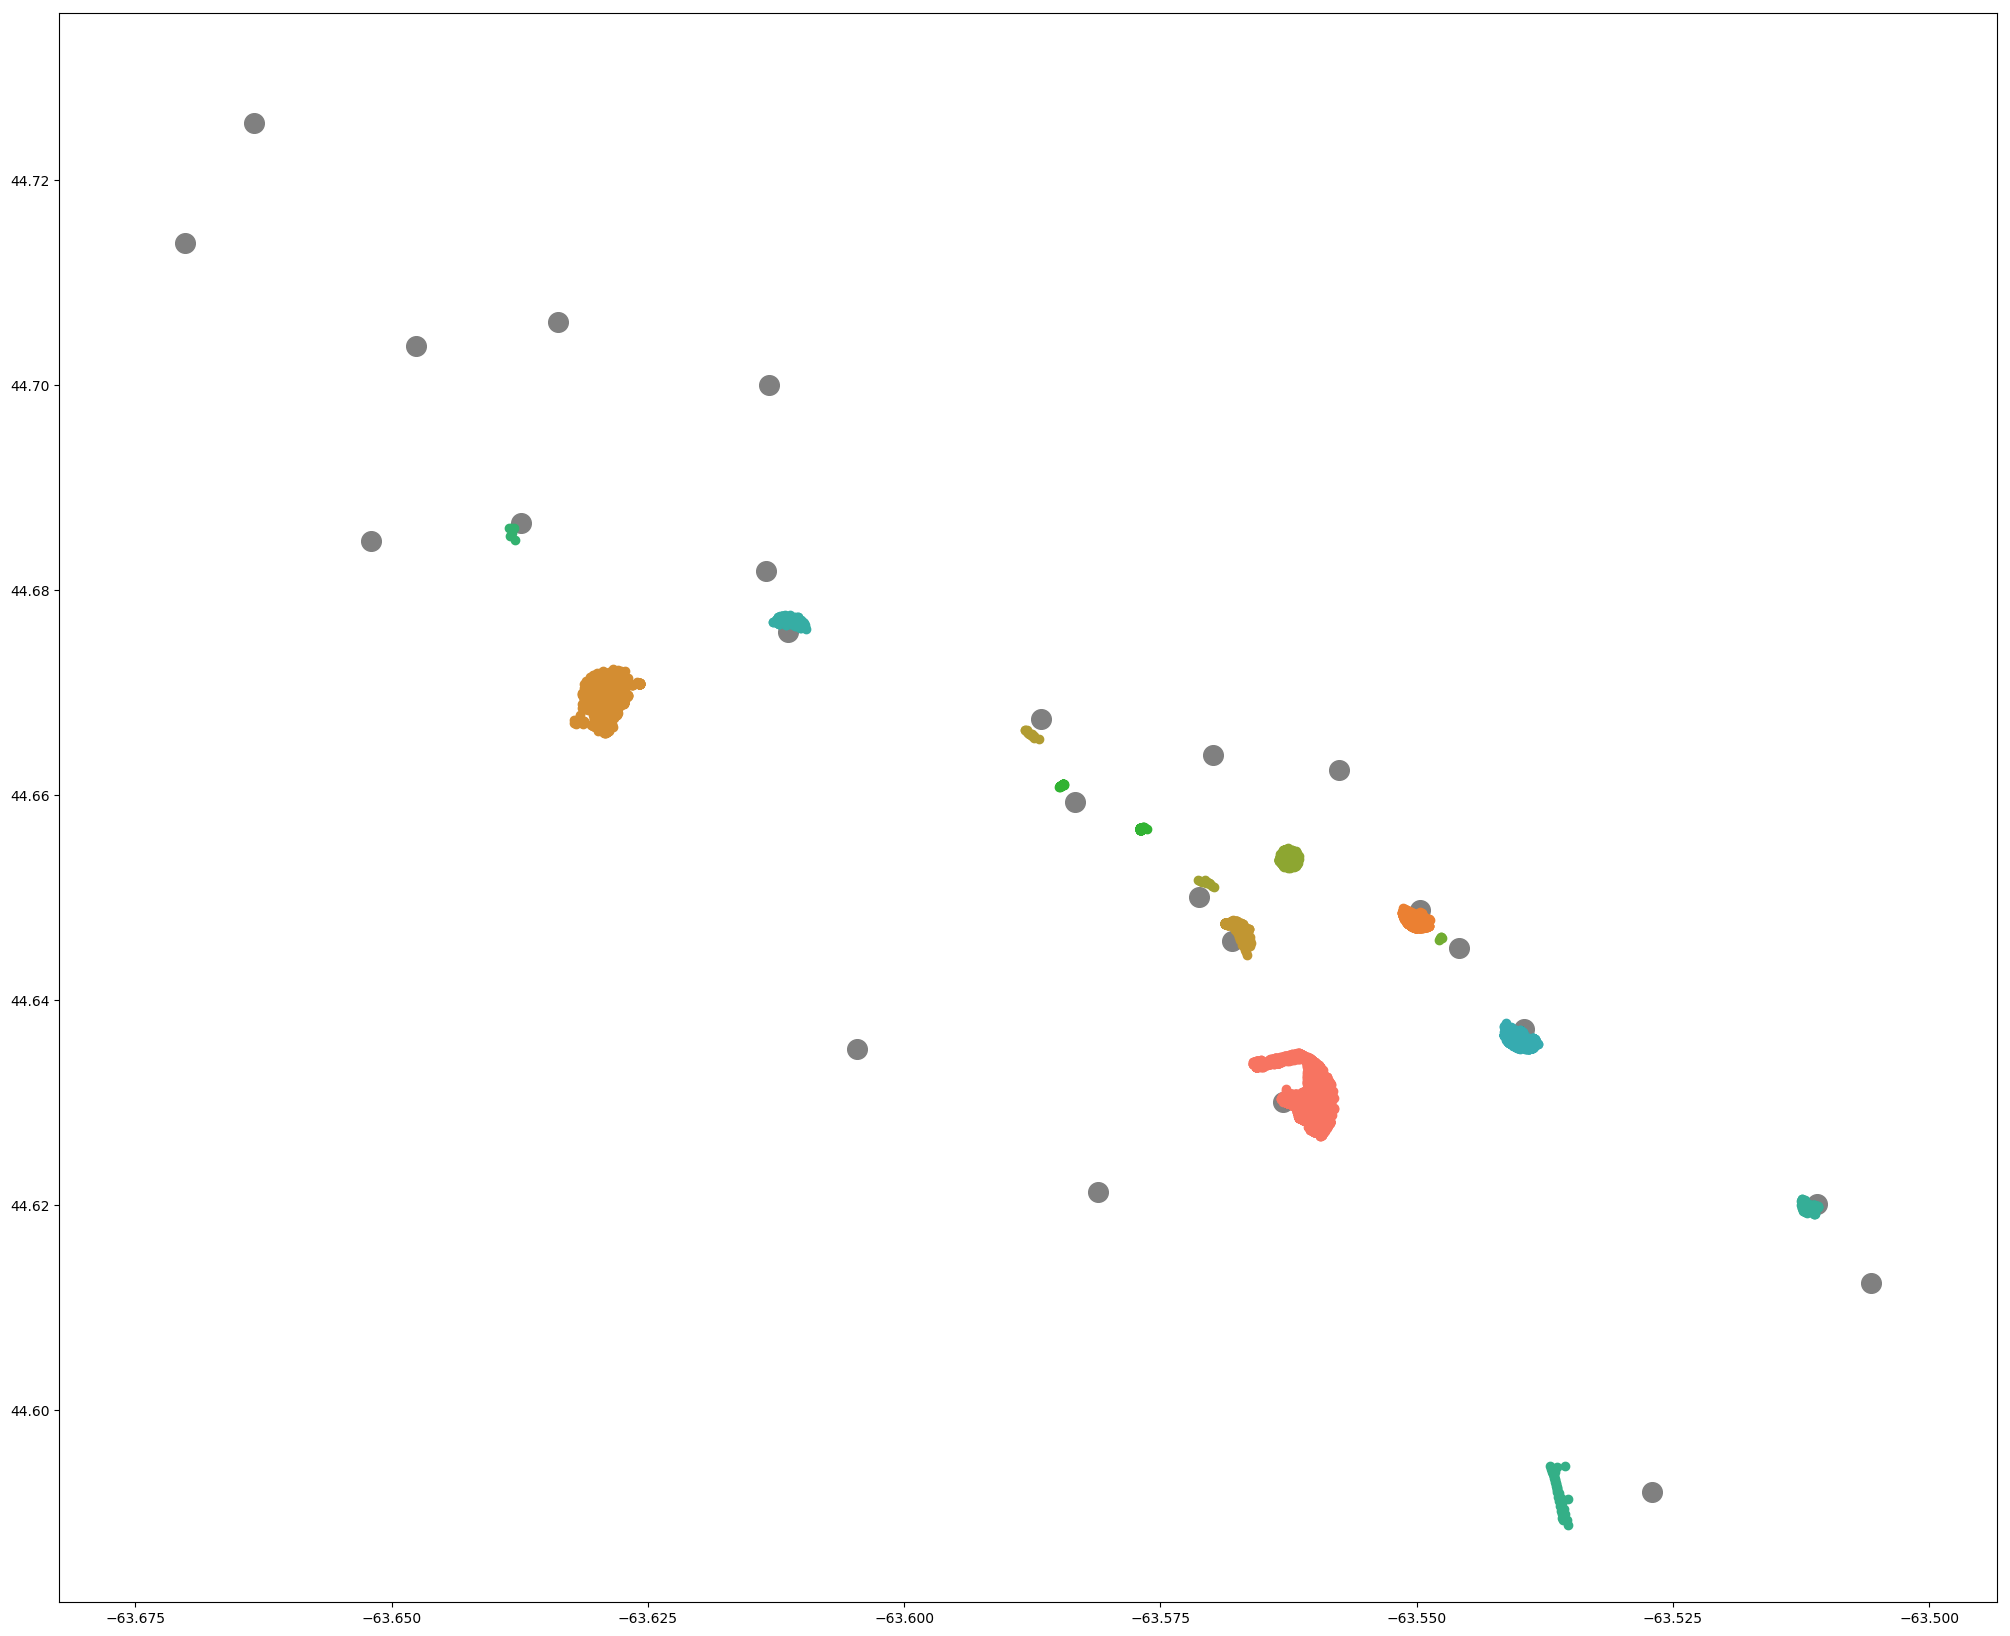

In [112]:
# ax =byname.plot(figsize=(25,25))
ax =gpd.GeoSeries(port_centroid).plot(color='gray',markersize=200,figsize=(25,25))
i=0
for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=current_palette[i])
  i=i+1

plt.savefig('picsave.png')

In [114]:
tmp=joinres.loc[joinres['index_right']=='auto_port',:]

In [115]:
tmp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2068 entries, 3124 to 5314
Data columns (total 10 columns):
Unnamed: 0           2068 non-null int64
event_time           2068 non-null object
position_accuracy    1446 non-null float64
mmsi                 2068 non-null int64
sog                  1446 non-null float64
cog                  1446 non-null float64
geometry             2068 non-null object
index_right          2068 non-null object
field_1              2068 non-null float64
size                 2068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 177.7+ KB


4. Select any port you like. Create a temporal chart for the density of messages in that port. Your x is the time and each snapshot of the time has the density of port at a specific hour. (​20 points​) 

In [99]:
joinres.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
0,0,2019-04-11T09:47:30.153Z,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835),NaN,NaN,NaN
1,1,2019-04-11T09:47:27.273Z,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667),NaN,NaN,NaN
2,2,2019-04-11T09:47:34.340Z,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333),NaN,NaN,NaN


In [101]:
type(joinres['event_time'][0])

str

In [103]:
from datetime import datetime

In [108]:
time = pd.to_datetime(joinres['event_time'][0])

In [109]:
time

Timestamp('2019-04-11 09:47:30.153000+0000', tz='UTC')

In [110]:
# change time string to datetime data type
joinres['event_time']=joinres['event_time'].apply(pd.to_datetime)

In [125]:
time=joinres['event_time'][1]

In [127]:
time.date()

datetime.date(2019, 4, 11)

In [284]:
selected_ports = joinres.loc[joinres['index_right']=='auto_port',:]

In [285]:
selected_ports.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
3124,3124,2019-06-28 09:54:52.526000+00:00,0.0,316013808,0.1,59.700001,POINT (-63.51242666666667 44.62054166666667),auto_port,8.0,0.0015
3125,3125,2019-06-28 09:54:52.526000+00:00,0.0,316013808,0.1,59.700001,POINT (-63.51242666666667 44.62054166666667),auto_port,8.0,0.0015
3126,3126,2019-05-18 10:18:55.155000+00:00,0.0,316013808,0.0,24.299999,POINT (-63.51236166666666 44.62050166666667),auto_port,8.0,0.0015


In [286]:
min_time=np.min(selected_ports['event_time'])

In [287]:
selected_ports.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2068 entries, 3124 to 5314
Data columns (total 10 columns):
Unnamed: 0           2068 non-null int64
event_time           2068 non-null object
position_accuracy    1446 non-null float64
mmsi                 2068 non-null int64
sog                  1446 non-null float64
cog                  1446 non-null float64
geometry             2068 non-null object
index_right          2068 non-null object
field_1              2068 non-null float64
size                 2068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 177.7+ KB


In [288]:
max_time = np.max(selected_ports['event_time'])

In [289]:
time_slot = pd.to_datetime(pd.date_range(min_time, max_time,freq='60T').strftime('%Y-%m-%dT%H:%M:%SZ').tolist())

In [290]:
len(time_slot)

2843

In [291]:
type(time_slot[2])

pandas._libs.tslibs.timestamps.Timestamp

In [292]:
time_slot[2]>min_time

True

In [293]:
selected_ports.sort_values(['event_time'])

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
3242,3242,2019-03-12 09:32:30.406000+00:00,NaN,316013808,NaN,NaN,POINT (-63.512365 44.61971833333333),auto_port,8.0,0.0015
3251,3251,2019-03-12 09:32:49.073000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51226 44.61968666666667),auto_port,8.0,0.0015
3252,3252,2019-03-12 09:32:55.579000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51223666666667 44.61968666666667),auto_port,8.0,0.0015
3246,3246,2019-03-12 09:33:16.086000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51219 44.61960833333333),auto_port,8.0,0.0015
5102,5102,2019-03-12 09:33:20.486000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51218000000001 44.61960333333333),auto_port,8.0,0.0015
5101,5101,2019-03-12 09:33:30.450000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51215666666667 44.61960166666667),auto_port,8.0,0.0015
5100,5100,2019-03-12 09:33:32.353000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51215166666667 44.61960166666667),auto_port,8.0,0.0015
5099,5099,2019-03-12 09:33:35.446000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51214166666666 44.61960333333333),auto_port,8.0,0.0015
5098,5098,2019-03-12 09:33:40.406000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51212333333334 44.61960833333333),auto_port,8.0,0.0015
5092,5092,2019-03-12 09:33:42.219000+00:00,NaN,316013808,NaN,NaN,POINT (-63.51211833333333 44.61960999999999),auto_port,8.0,0.0015


In [294]:
interval = np.arange(1,len(time_slot))

In [295]:
interval

array([   1,    2,    3, ..., 2840, 2841, 2842])

In [296]:
density = []
for i in interval:
    d = 0
    for index,row in selected_ports.iterrows():       
        if row['event_time']<time_slot[i] and row['event_time']>time_slot[i-1]:
            d=d+1
    density.append(d)
            

In [256]:
density[:50]

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [196]:
set(density)

{0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 25,
 27,
 28,
 31,
 33,
 35,
 46,
 59,
 68,
 69,
 75,
 81,
 92,
 104,
 119,
 133,
 138,
 184,
 222}

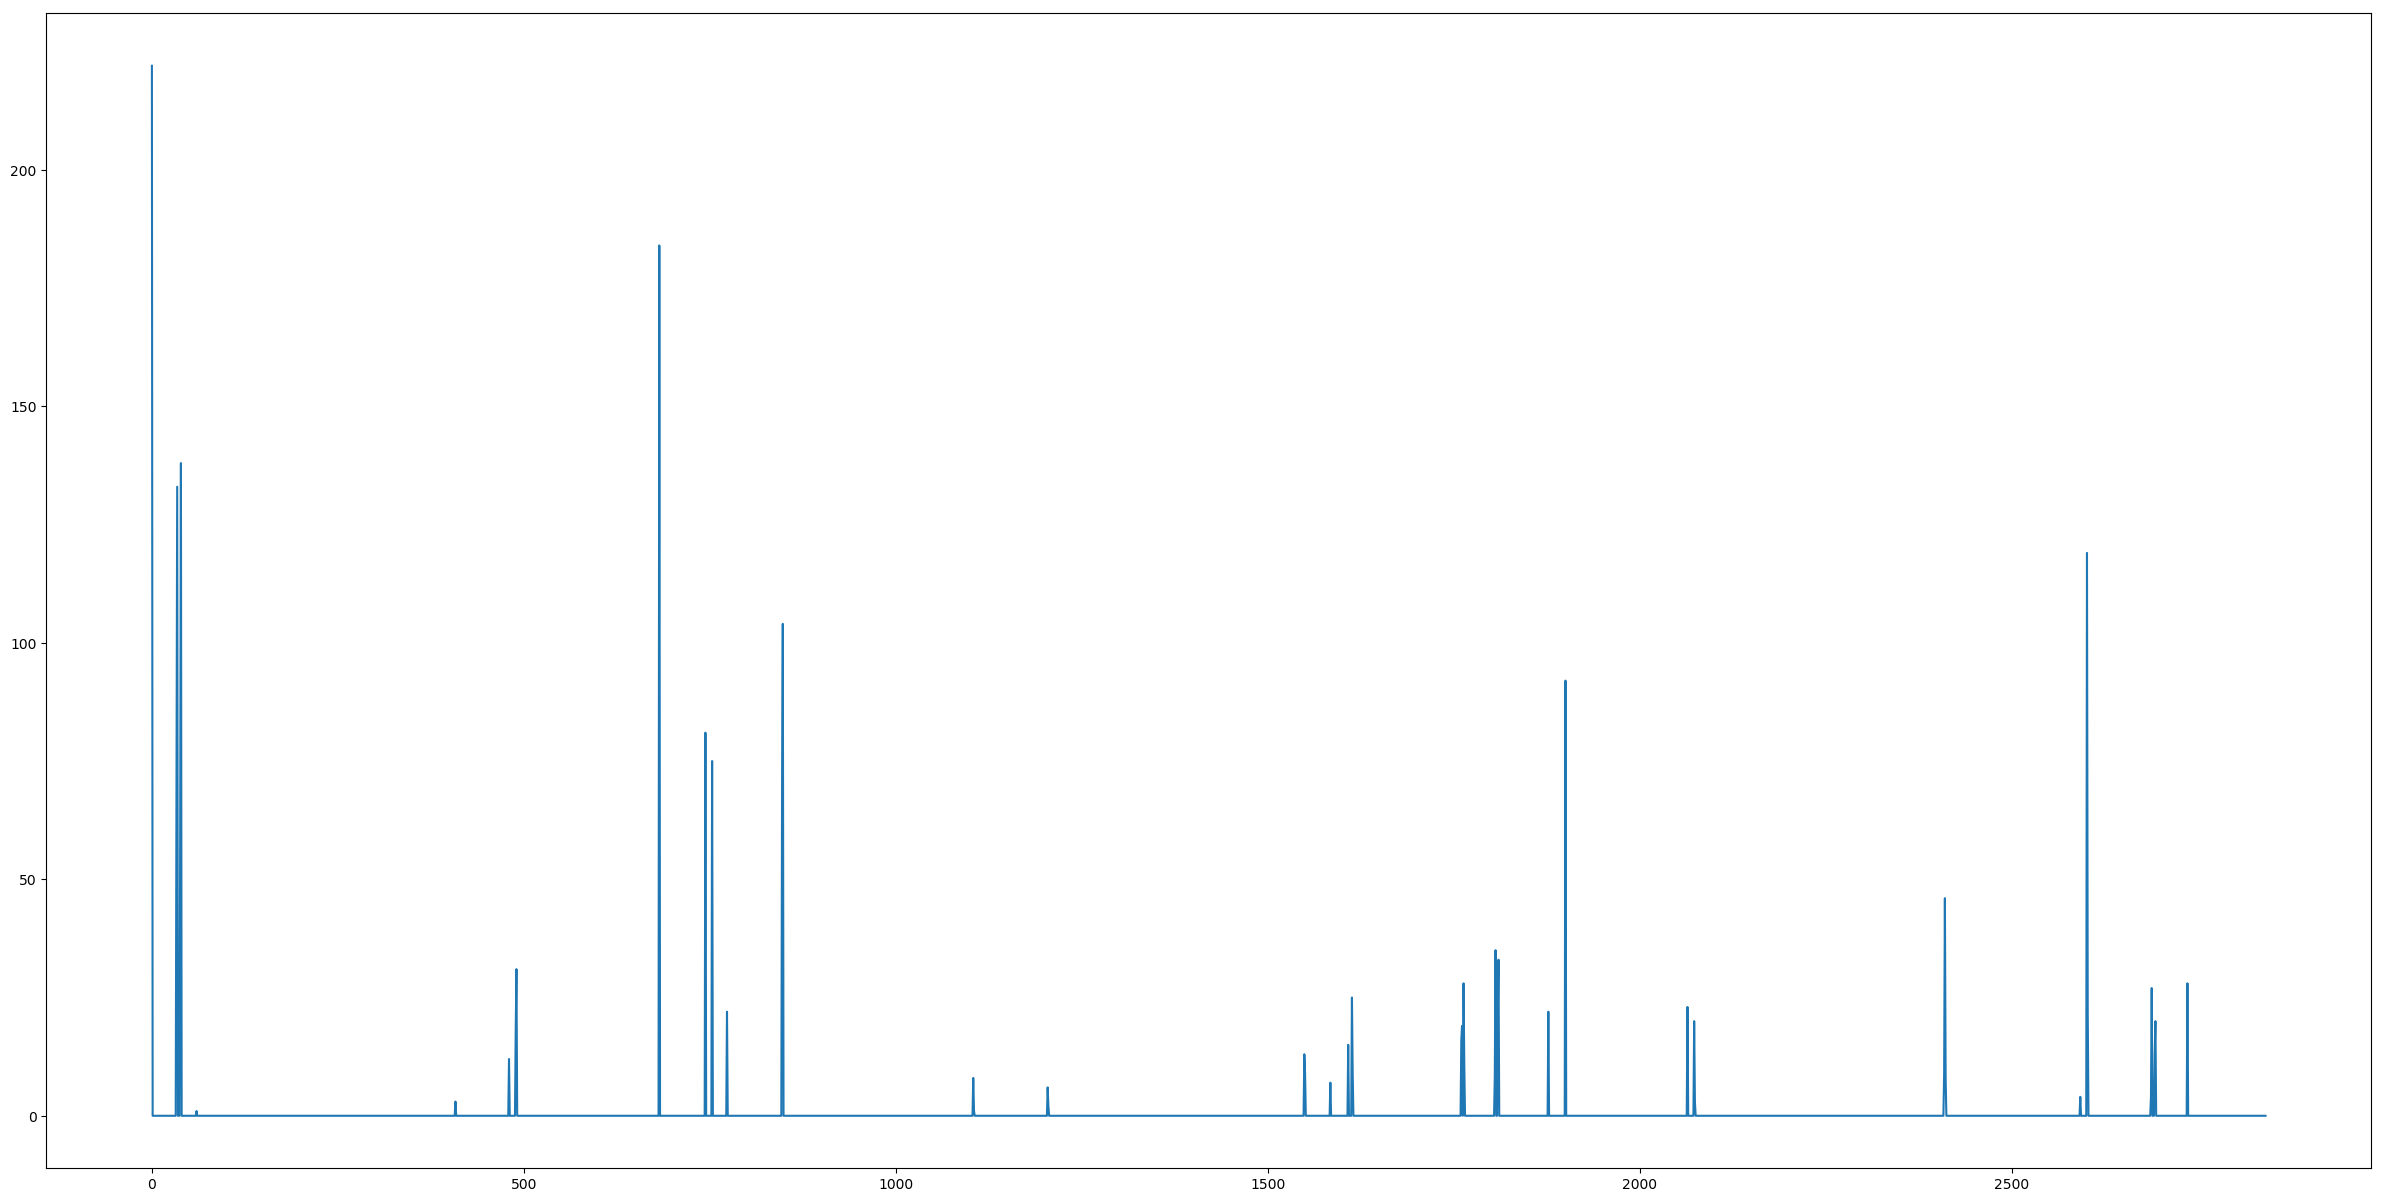

In [297]:
fig,axes = plt.subplots(figsize=(30,15))
axes.plot(density)
# plt.savefig('question4.png')

In [302]:
selected_ports.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size,hour
3124,3124,2019-06-28 09:54:52.526000+00:00,0.0,316013808,0.1,59.700001,POINT (-63.51242666666667 44.62054166666667),auto_port,8.0,0.0015,9
3125,3125,2019-06-28 09:54:52.526000+00:00,0.0,316013808,0.1,59.700001,POINT (-63.51242666666667 44.62054166666667),auto_port,8.0,0.0015,9
3126,3126,2019-05-18 10:18:55.155000+00:00,0.0,316013808,0.0,24.299999,POINT (-63.51236166666666 44.62050166666667),auto_port,8.0,0.0015,10


In [301]:
selected_ports['hour'] = selected_ports['event_time'].dt.hour 

C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
hour=selected_ports.groupby('hour').count()

In [322]:
hour

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
hour,,,,,,,,,,
0,192,192,0,192,0,0,192,192,192,192
1,5,5,0,5,0,0,5,5,5,5
9,209,209,75,209,75,75,209,209,209,209
10,226,226,138,226,138,138,226,226,226,226
13,18,18,18,18,18,18,18,18,18,18
14,142,142,142,142,142,142,142,142,142,142
15,80,80,80,80,80,80,80,80,80,80
16,28,28,28,28,28,28,28,28,28,28
17,120,120,120,120,120,120,120,120,120,120


In [316]:
hour_density=hour['event_time']

In [321]:
hour_index=hour_density.index

In [326]:
hour_density_24 = []
for i in np.arange(24):
    d = 0
    if i in hour_index:
        d= hour_density[i]
    hour_density_24.append(d)
    

In [327]:
hour_density_24

[192,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 209,
 226,
 0,
 0,
 18,
 142,
 80,
 28,
 120,
 125,
 569,
 295,
 36,
 1,
 22]

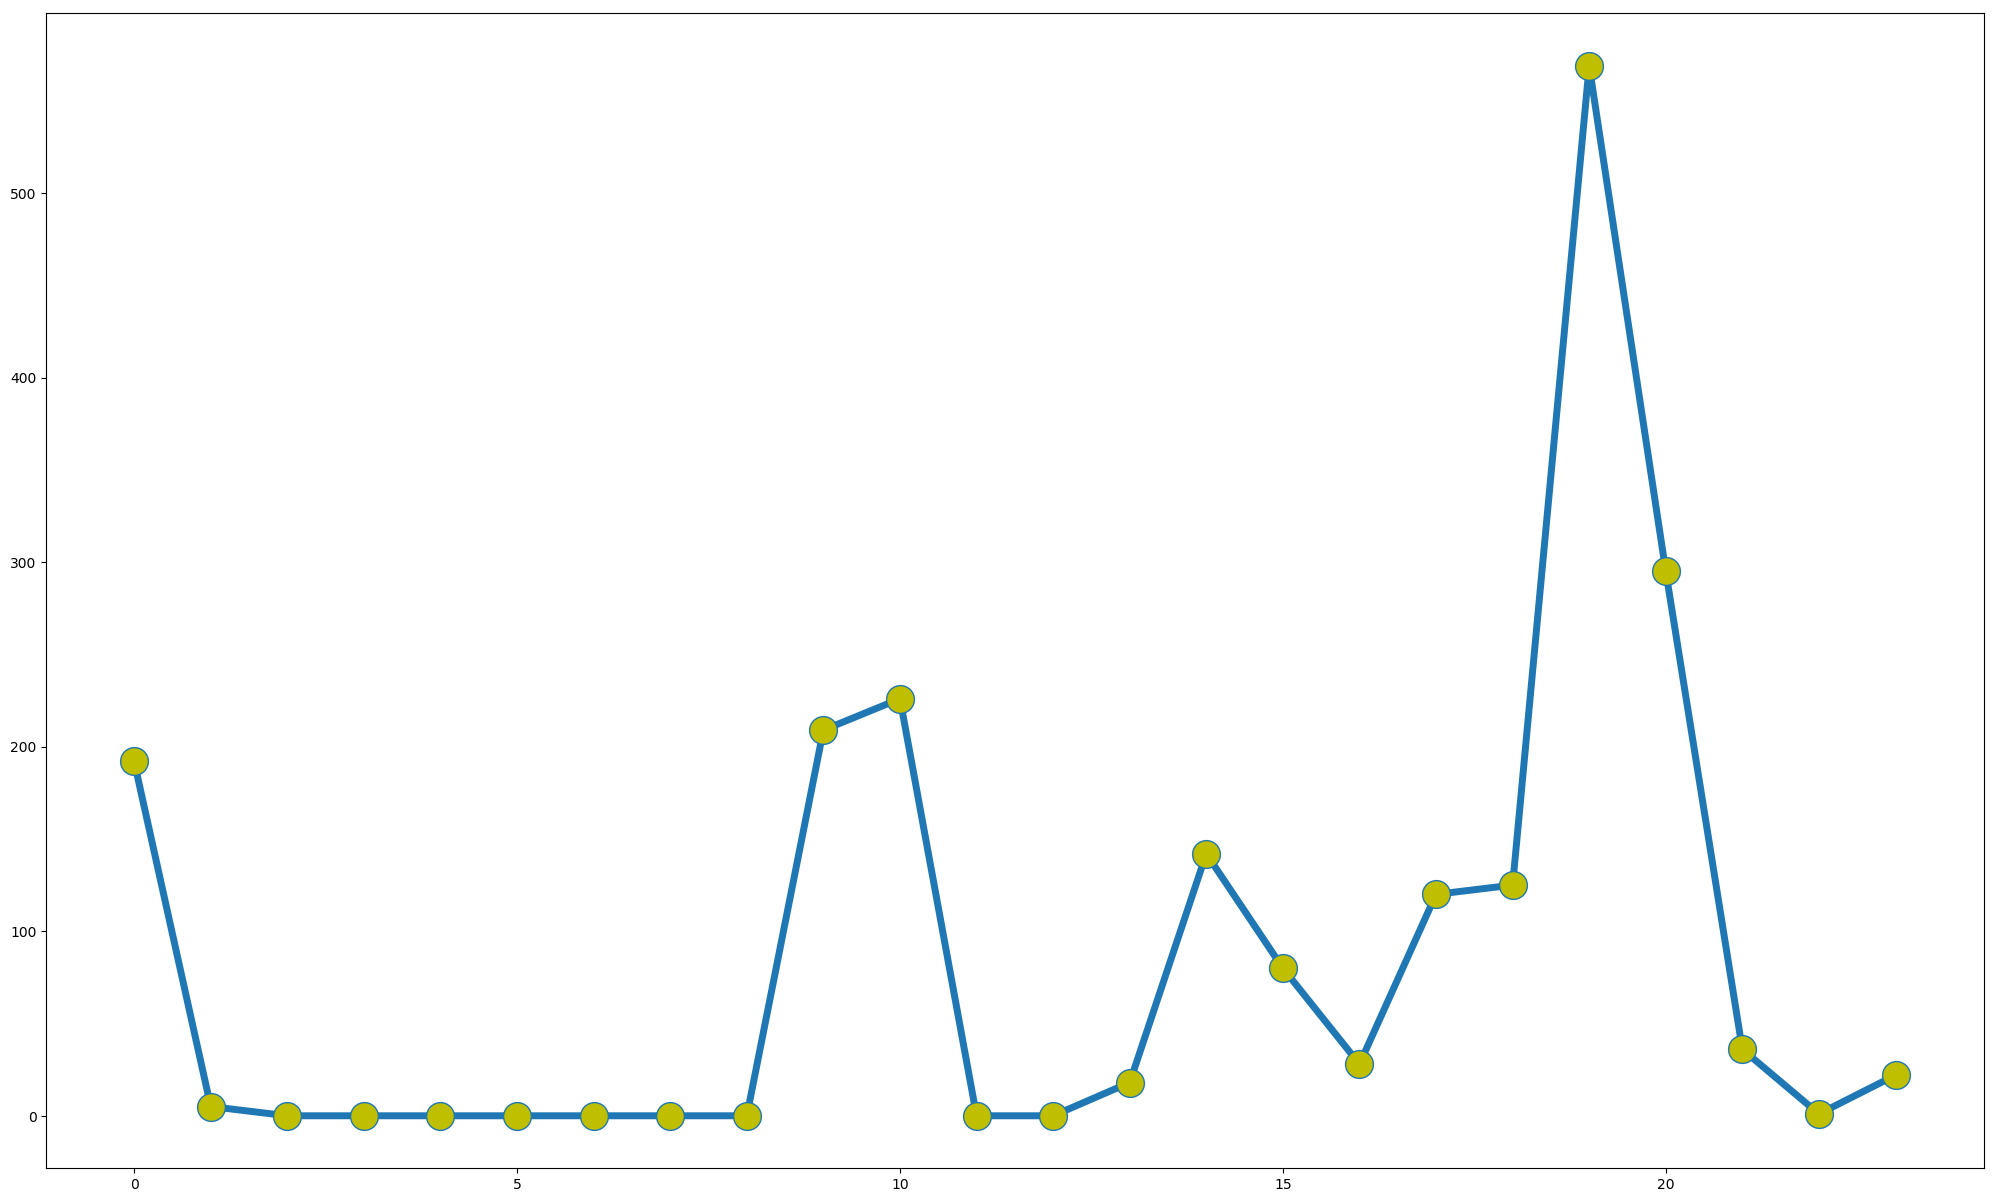

In [334]:
fig,axes = plt.subplots(figsize=(25,15))
axes.plot(hour_density_24,marker='o',markersize=20,lw=5,markerfacecolor='y')
# plt.savefig('question4.png')

5. Use concept drift methods on step 4 and find out if there is any drift in the data that can be detected. Try to play with the input parameters and justify the one you chose. Explain why the drift was detected, what characteristics changed? (​25 points​)

In [268]:
>>> # Imports
>>> import numpy as np
>>> from skmultiflow.drift_detection.adwin import ADWIN
>>> adwin = ADWIN()
>>> # Simulating a data stream as a normal distribution of 1's and 0's
>>> data_stream = np.random.randint(2, size=2000)
>>> # Changing the data concept from index 999 to 2000
>>> for i in range(999, 2000):
...     data_stream[i] = np.random.randint(4, high=8)
>>> # Adding stream elements to ADWIN and verifying if drift occurred
>>> for i in range(2000):
...     adwin.add_element(data_stream[i])
...     if adwin.detected_change():
...         print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

Change detected in data: 6 - at index: 1023
Change detected in data: 5 - at index: 1055
Change detected in data: 5 - at index: 1087


In [267]:
data_stream[960:1060]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 5, 6, 6, 5, 7,
       7, 4, 6, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7, 6, 5, 5, 5, 4, 6, 4, 5, 4,
       5, 6, 5, 7, 4, 6, 6, 6, 7, 6, 5, 5, 7, 4, 4, 5, 4, 6, 7, 4, 4, 5,
       7, 6, 4, 5, 6, 5, 5, 5, 7, 4, 6, 6])

In [340]:
adwin = ADWIN(delta=100)
for i in hour_density_24:
    adwin.add_element(i)
    if adwin.detected_change():
        print('Change detected in data: ' + i )
    

In [342]:
>>> # Imports
>>> import numpy as np
>>> from skmultiflow.drift_detection import DDM
>>> ddm = DDM(min_num_instances=24, warning_level=2.0, out_control_level=3.0)
>>> # Simulating a data stream as a normal distribution of 1's and 0's
>>> data_stream = np.random.randint(2, size=2000)
>>> # Changing the data concept from index 999 to 1500, simulating an
>>> # increase in error rate
>>> for i in range(999, 1500):
...     data_stream[i] = 0
>>> # Adding stream elements to DDM and verifying if drift occurred
# >>> for i in range(2000):
# ...     ddm.add_element(data_stream[i])
# ...     if ddm.detected_warning_zone():
# ...         print('Warning zone has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))
# ...     if ddm.detected_change():
# ...         print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))
j=0
>>> for i in hour_density_24:
...     eddm.add_element(i)
...     if eddm.detected_warning_zone():
...         print('Warning zone has been detected in data: ' + str(i)+'--'+str(j) )
...     if eddm.detected_change():
...         print('Change has been detected in data: ' + str(i)+'--'+str(j) )
        j = j+1

In [402]:
ddm = DDM(min_num_instances=2, warning_level=5.0, out_control_level=2.0)
j=0
for i in hour_density_24:
    eddm.add_element(i)
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(i)+'--'+str(j) )
    if eddm.detected_change():
        print('Change has been detected in data: ' + str(i)+'--'+str(j) )
    j = j+1

In [337]:
# >>> # Imports
# >>> import numpy as np
# >>> from skmultiflow.drift_detection.eddm import EDDM
# >>> eddm = EDDM()
# >>> # Simulating a data stream as a normal distribution of 1's and 0's
# >>> data_stream = np.random.randint(2, size=2000)
# >>> # Changing the data concept from index 999 to 1500, simulating an
# >>> # increase in error rate
# >>> for i in range(999, 1500):
# ...     data_stream[i] = 0
# >>> # Adding stream elements to EDDM and verifying if drift occurred
j=0
for i in hour_density_24:
    eddm.add_element(i)
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(i)+'--'+str(j) )
    if eddm.detected_change():
        print('Change has been detected in data: ' + str(i)+'--'+str(j) )
    j = j+1

In [357]:
>>> # Imports
>>> import numpy as np
>>> from skmultiflow.drift_detection import PageHinkley
>>> ph = PageHinkley(min_instances=0, delta=0.000001, threshold=1, alpha=0.001)
>>> # Simulating a data stream as a normal distribution of 1's and 0's
>>> data_stream = np.random.randint(2, size=2000)
>>> # Changing the data concept from index 999 to 2000
>>> for i in range(999, 2000):
...     data_stream[i] = np.random.randint(4, high=8)
>>> # Adding stream elements to the PageHinkley drift detector and verifying if drift occurred
j=0
>>> for i in hour_density_24:
...     ph.add_element(i)
...     if ph.detected_change():
...         print('Change has been detected in data: ' + str(i) + ' - of index: ' + str(j))
        j=j+1

Change has been detected in data: 209 - of index: 0
Change has been detected in data: 142 - of index: 1
Change has been detected in data: 120 - of index: 2
Change has been detected in data: 569 - of index: 3


In [403]:
#https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.drift_detection.html
from skmultiflow.drift_detection import PageHinkley
ph = PageHinkley(min_instances=6, delta=0.0005, threshold=5, alpha=0.9999)
j=0
for i in hour_density_24:
    ph.add_element(i)
    if ph.detected_change():
        print('Change has been detected in data: ' + str(i) + ' - of index: ' + str(j))
    j=j+1   

Change has been detected in data: 209 - of index: 9
Change has been detected in data: 142 - of index: 14
Change has been detected in data: 569 - of index: 19


### The drift was detected at 9,14,19 o'clock.
1. The drift detected at 9 o'clock, because the port is opening at 9, so the density will increase.
2. The drift detected at 14 o'clock, it might because it's the beginning of the second half of a day, people take the vessel to the destination.
3. The drift detected at 19 o'clock, it might because it's the end of the work, school, people take the vessel to go home or somewhere else.




6. Cluster the ports based on their message density using DBSCAN and categorize the ports based on traffic (message density).  (​25 points​) 

In [404]:
joinres.head(3)

,Unnamed: 0,event_time,position_accuracy,mmsi,sog,cog,geometry,index_right,field_1,size
0,0,2019-04-11 09:47:30.153000+00:00,0.0,316013808,3.0,319.500000,POINT (-63.55608166666666 44.624835),NaN,NaN,NaN
1,1,2019-04-11 09:47:27.273000+00:00,0.0,316013808,3.0,320.700012,POINT (-63.55605333333333 44.62481666666667),NaN,NaN,NaN
2,2,2019-04-11 09:47:34.340000+00:00,0.0,316013808,2.9,319.500000,POINT (-63.55613833333334 44.62486833333333),NaN,NaN,NaN


In [411]:
m_desity=joinres.groupby('index_right').count()['event_time']

In [424]:
m_desity.index

Index(['Fairview cove', 'armament', 'auto_port', 'ind', 'oulier_maybecday',
       'p010', 'po001', 'pointpolygon', 'port1', 'port2', 'port7',
       'south_enterance', 'southend container terminal', 'waterfront h'],
      dtype='object', name='index_right')

In [407]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 766671 entries, 0 to 766670
Data columns (total 7 columns):
Unnamed: 0           766671 non-null int64
event_time           766671 non-null object
position_accuracy    697295 non-null float64
mmsi                 766671 non-null int64
sog                  697295 non-null float64
cog                  697295 non-null float64
geometry             766671 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 40.9+ MB


In [409]:
port_name

array(['pointpolygon', 'port1', 'port2', 'ind', 'port5', 'port6', 'port7',
       'south_enterance', 'auto_port', 'southend container terminal',
       'NN Jetty', 'Bills island', 'mid bedford', 'Fairview cove',
       'armament', 'waterfront h', 'northarm', 'plll', 'pp', 'po001',
       'po002', 'oulier_maybecday', 'p003', 'enter2', 'p009', 'p010'],
      dtype=object)

In [421]:
len(port_name)

26

In [428]:
message_density = pd.DataFrame(np.zeros(len(port_name)),columns=['density'],index=port_name)

In [429]:
message_density


,density
pointpolygon,0.0
port1,0.0
port2,0.0
ind,0.0
port5,0.0
port6,0.0
port7,0.0
south_enterance,0.0
auto_port,0.0
southend container terminal,0.0


In [432]:
for port in port_name:
    if port in m_desity.index:
        message_density['density'][port] = m_desity[port]

In [433]:
message_density

,density
pointpolygon,153.0
port1,13.0
port2,119.0
ind,5.0
port5,0.0
port6,0.0
port7,703250.0
south_enterance,39.0
auto_port,2068.0
southend container terminal,7544.0


In [435]:
message_density['density']=message_density['density'].apply(int)

array([-1], dtype=int64)

In [441]:
X = []
for i in message_density['density']:
    a = np.array([i])
    X.append(a)

In [442]:
X

[array([153]),
 array([13]),
 array([119]),
 array([5]),
 array([0]),
 array([0]),
 array([703250]),
 array([39]),
 array([2068]),
 array([7544]),
 array([0]),
 array([0]),
 array([0]),
 array([1481]),
 array([14]),
 array([229]),
 array([0]),
 array([0]),
 array([0]),
 array([1445]),
 array([0]),
 array([255]),
 array([0]),
 array([0]),
 array([0]),
 array([6])]

In [507]:
for i in np.arange(0, 10, 0.5):
    print(i, end=', ')

0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 

In [618]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
min_s = np.arange(2,10)
ep = np.arange(0.1,10, 0.2)
for e in ep:
    for m in min_s:
#         print()
        clustering = DBSCAN(eps=e, min_samples=m).fit(X)
        if len(set(clustering.labels_))>2:
            print(len(set(clustering.labels_)),'---',e ,"---",m)


4 --- 1.1000000000000003 --- 2
4 --- 1.3000000000000003 --- 2
4 --- 1.5000000000000004 --- 2
4 --- 1.7000000000000004 --- 2
4 --- 1.9000000000000004 --- 2
4 --- 2.1000000000000005 --- 2
4 --- 2.3000000000000007 --- 2
4 --- 2.5000000000000004 --- 2
4 --- 2.7000000000000006 --- 2
4 --- 2.900000000000001 --- 2
4 --- 3.1000000000000005 --- 2
4 --- 3.3000000000000007 --- 2
4 --- 3.500000000000001 --- 2
4 --- 3.7000000000000006 --- 2
4 --- 3.900000000000001 --- 2
4 --- 4.1000000000000005 --- 2
4 --- 4.300000000000001 --- 2
4 --- 4.500000000000001 --- 2
4 --- 4.7 --- 2
4 --- 4.9 --- 2
3 --- 5.1000000000000005 --- 2
3 --- 5.300000000000001 --- 2
3 --- 5.500000000000001 --- 2
3 --- 5.700000000000001 --- 2
3 --- 5.9 --- 2
3 --- 6.1000000000000005 --- 2
3 --- 6.300000000000001 --- 2
3 --- 6.500000000000001 --- 2
3 --- 6.700000000000001 --- 2
3 --- 6.900000000000001 --- 2


In [626]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [627]:
clustering.labels_

array([-1,  0, -1,  1,  2,  2, -1, -1, -1, -1,  2,  2,  2, -1,  0, -1,  2,
        2,  2, -1,  2, -1,  2,  2,  2,  1], dtype=int64)

In [628]:
message_density['class']=clustering.labels_

In [629]:
message_density

,density,class
pointpolygon,153,-1
port1,13,0
port2,119,-1
ind,5,1
port5,0,2
port6,0,2
port7,703250,-1
south_enterance,39,-1
auto_port,2068,-1
southend container terminal,7544,-1


In [630]:
message_density[message_density['class']==0]

,density,class
port1,13,0
armament,14,0


In [631]:
message_density[message_density['class']==1]

,density,class
ind,5,1
p010,6,1


In [632]:
message_density[message_density['class']==-1]

,density,class
pointpolygon,153,-1
port2,119,-1
port7,703250,-1
south_enterance,39,-1
auto_port,2068,-1
southend container terminal,7544,-1
Fairview cove,1481,-1
waterfront h,229,-1
po001,1445,-1
oulier_maybecday,255,-1


In [636]:
message_density[message_density['class']==2]['density'].unique()

array([0], dtype=int64)